In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data_folder_path = Path('../../../data/')

data = pd.read_csv(data_folder_path / 'data_train_all.csv')
data_columns = pd.read_csv(data_folder_path / 'data_train_all_columns.csv')
print("Training data shape:", data.shape)
print("Column table columns:", data_columns.columns)
print("Unique column types:", data_columns.column_type.unique())

predictor_columns = data_columns[data_columns['column_type'].isin(['predictor_n_grams', 'predictor_continuous'])]['column_name'].tolist()
print(f"Number of predictorcolumns: {len(predictor_columns)}")

target_columns = data_columns[data_columns['column_type'] == 'target']['column_name'].tolist()
print(f"Target columns: {target_columns}")
print(f"Number of target columns: {len(target_columns)}")

Training data shape: (255606, 144)
Column table columns: Index(['column_name', 'column_type'], dtype='object')
Unique column types: ['id' 'data' 'target' 'predictor_continuous' 'predictor_n_grams']
Number of predictorcolumns: 119
Target columns: ['spotify_popularity', 'on_hot100', 'decade', 'main_genre']
Number of target columns: 4


Training set size: 204484
Test set size: 51122

Training Random Forest for: decade

Accuracy: 0.4184

Classification Report:
              precision    recall  f1-score   support

      1950.0       0.22      0.03      0.05       220
      1960.0       0.17      0.02      0.04      1330
      1970.0       0.13      0.01      0.02      2348
      1980.0       0.08      0.01      0.01      2791
      1990.0       0.19      0.04      0.07      5600
      2000.0       0.29      0.19      0.23     11656
      2010.0       0.46      0.86      0.60     21825
      2020.0       0.18      0.02      0.03      5352

    accuracy                           0.42     51122
   macro avg       0.22      0.15      0.13     51122
weighted avg       0.32      0.42      0.32     51122



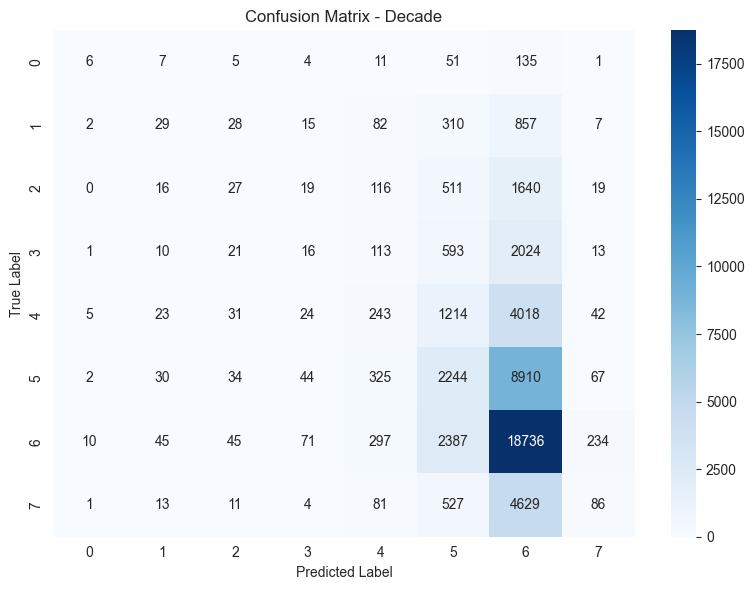


Top 20 features for decade:
                 feature  importance
9   unique_chord_density    0.074981
2   unique_5gram_density    0.071936
4       average_4overlap    0.067332
8       average_2overlap    0.066884
5       average_5overlap    0.065218
3       average_3overlap    0.065209
0            drone_ratio    0.065150
1        average_overlap    0.064388
6        maj_triad_ratio    0.059278
7        min_triad_ratio    0.055736
89        contains_G,C,D    0.007343
81        contains_D,C,G    0.006893
65        contains_C,D,C    0.006823
79        contains_G,D,C    0.006812
74        contains_G,F,G    0.006563
84        contains_C,D,G    0.006363
87        contains_C,G,C    0.006327
71     contains_G,C,Amin    0.006310
86        contains_C,G,D    0.006021
83        contains_D,G,C    0.006004


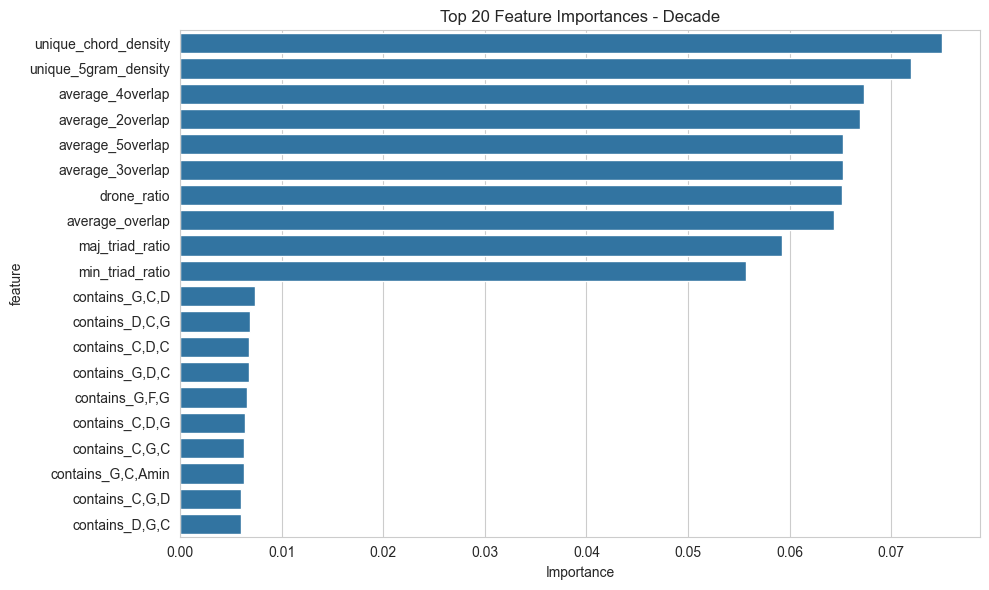

In [6]:
# Prepare data
X = data[predictor_columns]
y = data['decade']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Train Random Forest
print(f"Training Random Forest for: decade")

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decade')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': predictor_columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 20 features for decade:")
print(feature_importance.head(20))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Feature Importances - Decade')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

Training set size: 204484
Test set size: 51122
Training Random Forest for: genre

Accuracy: 0.2798

Classification Report:
              precision    recall  f1-score   support

 alternative       0.21      0.13      0.16      7177
     country       0.34      0.36      0.35      7599
  electronic       0.00      0.00      0.00       342
        jazz       0.26      0.05      0.08       898
       metal       0.25      0.03      0.06      1720
         pop       0.29      0.58      0.39     12342
    pop rock       0.15      0.03      0.05      5765
        punk       0.23      0.07      0.10      2446
         rap       0.20      0.07      0.10      1471
      reggae       0.12      0.03      0.04       557
        rock       0.26      0.29      0.28      9763
        soul       0.14      0.02      0.04      1042

    accuracy                           0.28     51122
   macro avg       0.20      0.14      0.14     51122
weighted avg       0.25      0.28      0.24     51122



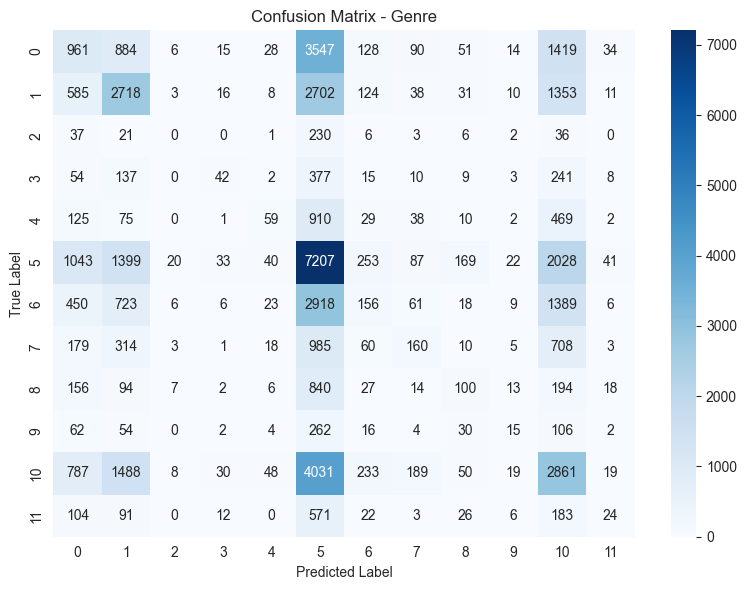


Top 20 features for genre:
                 feature  importance
2   unique_5gram_density    0.070890
9   unique_chord_density    0.070127
8       average_2overlap    0.066481
4       average_4overlap    0.066072
5       average_5overlap    0.065538
1        average_overlap    0.065156
3       average_3overlap    0.064732
0            drone_ratio    0.064340
6        maj_triad_ratio    0.060706
7        min_triad_ratio    0.056279
89        contains_G,C,D    0.007073
81        contains_D,C,G    0.006834
70     contains_Amin,G,C    0.006789
79        contains_G,D,C    0.006760
65        contains_C,D,C    0.006680
74        contains_G,F,G    0.006614
71     contains_G,C,Amin    0.006527
84        contains_C,D,G    0.006445
76     contains_C,Amin,G    0.006305
69     contains_C,G,Emin    0.006093


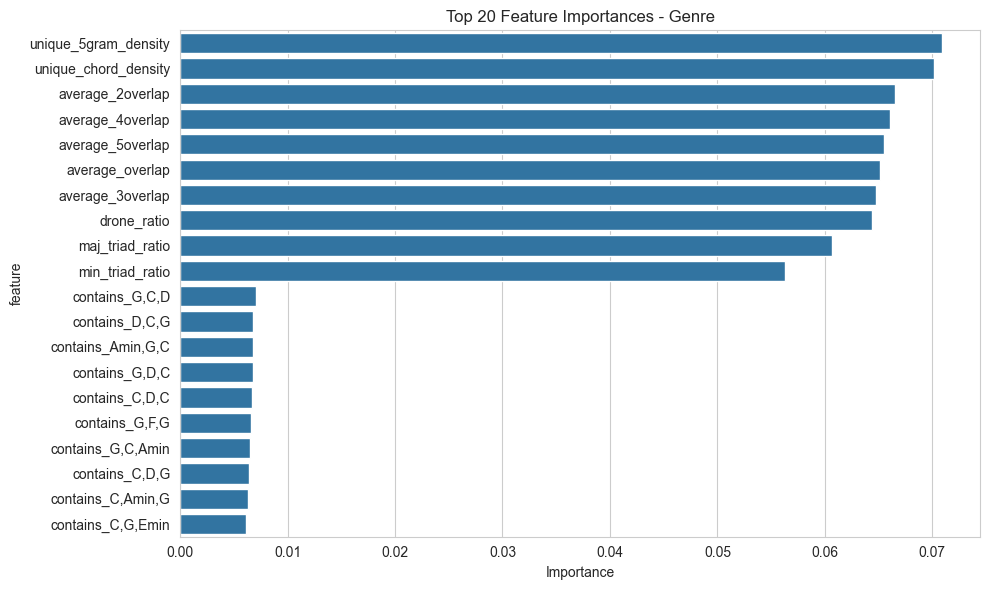

In [10]:
# Prepare data
X = data[predictor_columns]
y = data['main_genre']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Train Random Forest
print(f"Training Random Forest for: genre")

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Genre')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': predictor_columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 20 features for genre:")
print(feature_importance.head(20))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Feature Importances - Genre')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

Training set size: 144927
Test set size: 36232
Training Random Forest for: on_hot100

Accuracy: 0.9641

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     34953
         1.0       0.08      0.00      0.00      1279

    accuracy                           0.96     36232
   macro avg       0.52      0.50      0.49     36232
weighted avg       0.93      0.96      0.95     36232



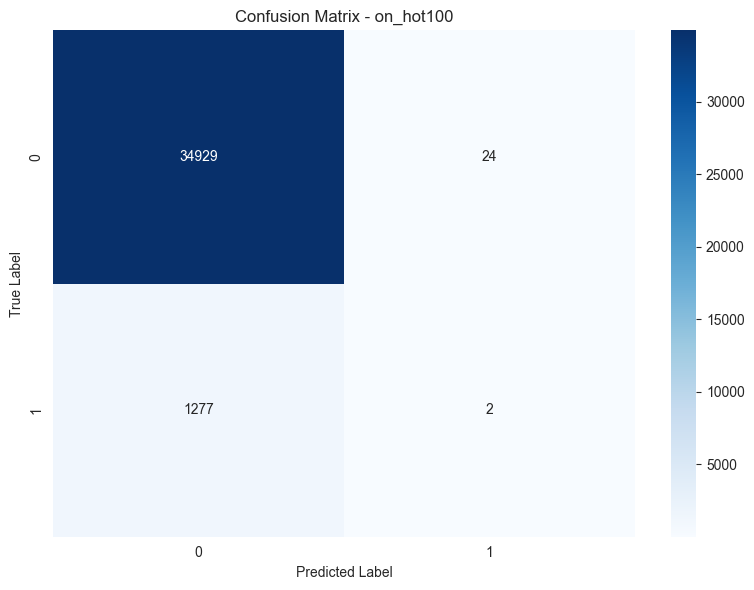


Top 20 features for on_hot100:
                  feature  importance
1    unique_5gram_density    0.080307
0    unique_chord_density    0.077277
7        average_2overlap    0.073035
4        average_5overlap    0.071738
8         average_overlap    0.071343
5        average_4overlap    0.071261
6        average_3overlap    0.070595
9             drone_ratio    0.070464
3         maj_triad_ratio    0.062837
2         min_triad_ratio    0.055655
89         contains_G,C,D    0.005990
81         contains_D,C,G    0.005805
79         contains_G,D,C    0.005473
71      contains_G,C,Amin    0.005370
88         contains_G,C,G    0.005326
87         contains_C,G,C    0.005300
84         contains_C,D,G    0.005172
114     contains_Amin,D,G    0.005158
86         contains_C,G,D    0.005130
65         contains_C,D,C    0.005059


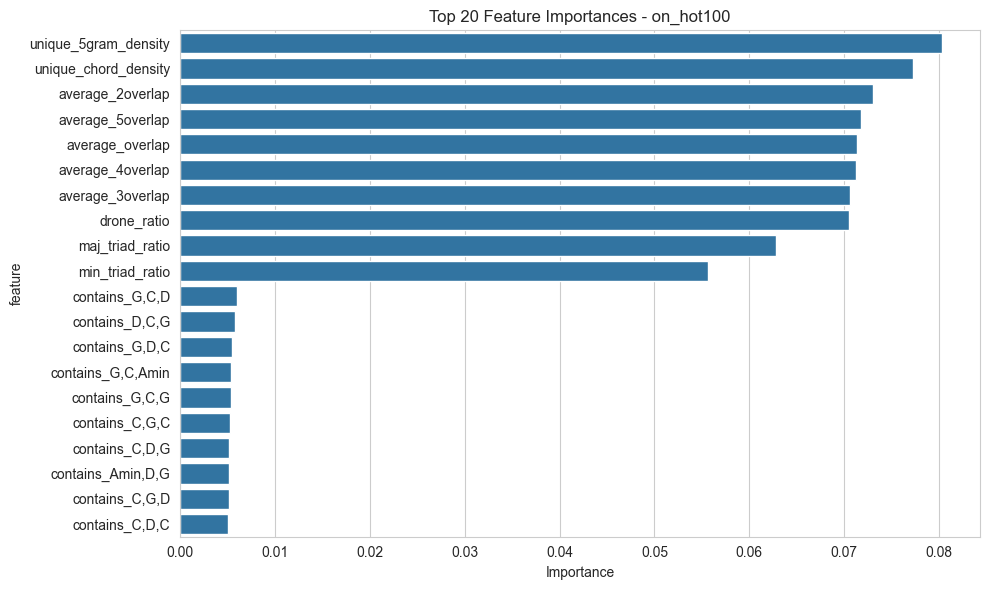

In [6]:
# Prepare data
X = data[predictor_columns]
y = data['on_hot100']

# Drop rows with NaN in on_hot100
valid_indices = y.notna()
X_filtered = X[valid_indices]
y_filtered = y[valid_indices]

# 80/20 split - use filtered data
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Train Random Forest
print(f"Training Random Forest for: on_hot100")

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - on_hot100')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': predictor_columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 20 features for on_hot100:")
print(feature_importance.head(20))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Feature Importances - on_hot100')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [10]:
# Drop rows with NaN in on_hot100 or any predictor columns
combined_data = data[predictor_columns + ['on_hot100']].dropna()

X_filtered = combined_data[predictor_columns]
y_filtered = combined_data['on_hot100']

print(f"Rows after dropping NaNs: {len(y_filtered)}")
print(f"\nClass distribution:")
print(f"Class 0: {(y_filtered == 0).sum()} ({(y_filtered == 0).sum() / len(y_filtered) * 100:.2f}%)")
print(f"Class 1: {(y_filtered == 1).sum()} ({(y_filtered == 1).sum() / len(y_filtered) * 100:.2f}%)")

Rows after dropping NaNs: 181159

Class distribution:
Class 0: 174764 (96.47%)
Class 1: 6395 (3.53%)


In [13]:
print("\n An f1-score of 0.96 is exceptionally good. However, there is a very small number of positive rows (songs that made it to the 100 list). Looking at the confusion matrix we see that there are only 2 songs that were correctly predicted to be positive, while there are 24 which were incorrectly predicted to be negative.")


 An f1-score of 0.96 is exceptionally good. However, there is a very small number of positive rows (songs that made it to the 100 list). Looking at the confusion matrix we see that there are only 2 songs that were correctly predicted to be positive, while there are 24 which were incorrectly predicted to be negative.
